In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time

import warnings 
from sklearn.preprocessing import OneHotEncoder
import plotly.express as px
from scipy.stats.mstats import winsorize

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, validation_curve, KFold
from sklearn.metrics import plot_confusion_matrix, accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

'''
app_test=pd.read_csv('/Users/naimboraatlay/Desktop/ppi_ag/bootcamp/datasets/home-credit-default-risk/application_test.csv')
app_train=pd.read_csv('/Users/naimboraatlay/Desktop/ppi_ag/bootcamp/datasets/home-credit-default-risk/application_train.csv')

bureau=pd.read_csv('/Users/naimboraatlay/Desktop/ppi_ag/bootcamp/datasets/home-credit-default-risk/bureau.csv')
bureau_bal=pd.read_csv('/Users/naimboraatlay/Desktop/ppi_ag/bootcamp/datasets/home-credit-default-risk/bureau_balance.csv')

card_bal=pd.read_csv('/Users/naimboraatlay/Desktop/ppi_ag/bootcamp/datasets/home-credit-default-risk/credit_card_balance.csv')
instll_paymnts=pd.read_csv('/Users/naimboraatlay/Desktop/ppi_ag/bootcamp/datasets/home-credit-default-risk/installments_payments.csv')

poscash_bal_test=pd.read_csv('/Users/naimboraatlay/Desktop/ppi_ag/bootcamp/datasets/home-credit-default-risk/pos_cash_balance.csv')
prev_app=pd.read_csv('/Users/naimboraatlay/Desktop/ppi_ag/bootcamp/datasets/home-credit-default-risk/previous_application.csv')
sample_sub=pd.read_csv('/Users/naimboraatlay/Desktop/ppi_ag/bootcamp/datasets/home-credit-default-risk/sample_submission.csv')
'''

In [2]:
app_train=pd.read_csv('/Users/naimboraatlay/Desktop/ppi_ag/bootcamp/datasets/home-credit-default-risk/application_train.csv')
description_table=pd.read_csv('/Users/naimboraatlay/Desktop/ppi_ag/bootcamp/datasets/home-credit-default-risk/home_credit_columns_description.csv', encoding='ISO-8859-1', index_col=0)

In [3]:
description_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 1 to 221
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Table        219 non-null    object
 1   Row          219 non-null    object
 2   Description  219 non-null    object
 3   Special      86 non-null     object
dtypes: object(4)
memory usage: 8.6+ KB


In [4]:
description_table = description_table.reset_index()

In [5]:
del description_table["index"]

In [6]:
#0-123/

description_table.head(125)

,Table,Row,Description,Special
0,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...
120,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_QRT,Number of enquiries to Credit Bureau about the...,NaN
121,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_YEAR,Number of enquiries to Credit Bureau about the...,NaN
122,bureau.csv,SK_ID_CURR,ID of loan in our sample - one loan in our sam...,hashed
123,bureau.csv,SK_BUREAU_ID,Recoded ID of previous Credit Bureau credit re...,hashed


In [7]:
app_train_copy = app_train.copy()

In [8]:
conditions = [
    (app_train_copy['NAME_HOUSING_TYPE'] == "House / apartment"),
    (app_train_copy['NAME_HOUSING_TYPE'] == "Rented apartment"),
    (app_train_copy['NAME_HOUSING_TYPE'] == "With parents"),
    (app_train_copy['NAME_HOUSING_TYPE'] == "Municipal apartment"),
    (app_train_copy['NAME_HOUSING_TYPE'] == "Office apartment"),
    (app_train_copy['NAME_HOUSING_TYPE'] == "Co-op apartment")
    ]

values = [0, 1, 2, 3, 4, 5]
#values = ['2nd', '3rd', '1st']

app_train_copy['NAME_HOUSING_TYPE_NBR'] = np.select(conditions, values)
#app_train_copy['new_class'] = to_categorical(titanic['new_class'], num_classes=3)

In [9]:
app_train_copy[['NAME_HOUSING_TYPE_NBR']]

,NAME_HOUSING_TYPE_NBR
0,0
1,0
2,0
3,0
4,0
...,...
307506,2
307507,0
307508,0
307509,0


In [10]:
df_bora = app_train[['SK_ID_CURR','NAME_HOUSING_TYPE','AMT_ANNUITY']]

In [11]:
print(df_bora)

        SK_ID_CURR  NAME_HOUSING_TYPE  AMT_ANNUITY
0           100002  House / apartment      24700.5
1           100003  House / apartment      35698.5
2           100004  House / apartment       6750.0
3           100006  House / apartment      29686.5
4           100007  House / apartment      21865.5
...            ...                ...          ...
307506      456251       With parents      27558.0
307507      456252  House / apartment      12001.5
307508      456253  House / apartment      29979.0
307509      456254  House / apartment      20205.0
307510      456255  House / apartment      49117.5

[307511 rows x 3 columns]


In [12]:
annuity = app_train_copy[['AMT_ANNUITY']]

In [13]:
#plt.hist(annuity,bins=50)

In [14]:
#print(annuity.min(),annuity.max())

### BORA

In [15]:
df_bora = pd.get_dummies(df_bora, columns=['NAME_HOUSING_TYPE'])

In [16]:
df_bora.head()

,SK_ID_CURR,AMT_ANNUITY,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,100002,24700.5,0,1,0,0,0,0
1,100003,35698.5,0,1,0,0,0,0
2,100004,6750.0,0,1,0,0,0,0
3,100006,29686.5,0,1,0,0,0,0
4,100007,21865.5,0,1,0,0,0,0


In [17]:
df_bora['AMT_ANNUITY_LOG'] = np.log(df_bora['AMT_ANNUITY'])

(array([1.0000e+00, 4.0000e+00, 1.1000e+01, 1.1000e+01, 4.2000e+01,
        8.3000e+01, 1.5000e+02, 3.0800e+02, 5.8200e+02, 1.1240e+03,
        1.2370e+03, 4.3120e+03, 3.3390e+03, 1.0275e+04, 7.7970e+03,
        9.3710e+03, 1.7185e+04, 1.4103e+04, 2.0682e+04, 2.0078e+04,
        2.6543e+04, 3.1089e+04, 2.9075e+04, 2.9897e+04, 2.4564e+04,
        1.8693e+04, 1.4994e+04, 1.0836e+04, 5.2890e+03, 3.3300e+03,
        1.1350e+03, 6.1200e+02, 3.4300e+02, 2.1400e+02, 1.0700e+02,
        2.2000e+01, 1.7000e+01, 8.0000e+00, 3.4000e+01, 2.0000e+00]),
 array([ 7.38739979,  7.51423513,  7.64107048,  7.76790583,  7.89474118,
         8.02157652,  8.14841187,  8.27524722,  8.40208257,  8.52891792,
         8.65575326,  8.78258861,  8.90942396,  9.03625931,  9.16309465,
         9.28993   ,  9.41676535,  9.5436007 ,  9.67043605,  9.79727139,
         9.92410674, 10.05094209, 10.17777744, 10.30461278, 10.43144813,
        10.55828348, 10.68511883, 10.81195418, 10.93878952, 11.06562487,
        11.19246

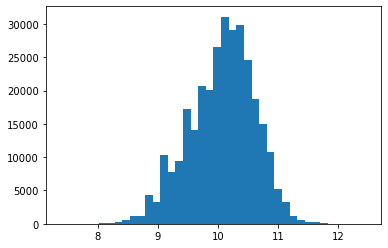

In [18]:
plt.hist(df_bora['AMT_ANNUITY_LOG'],bins=40)

### LENNARD

In [19]:
df_lennard = pd.DataFrame(app_train_copy['SK_ID_CURR'].copy())

lower_edu_index = (app_train_copy.NAME_EDUCATION_TYPE == 'Secondary / secondary special') | (app_train_copy.NAME_EDUCATION_TYPE == 'Lower secondary')
df_lennard['HIGHER_EDUCATION'] = 1
df_lennard['HIGHER_EDUCATION'][lower_edu_index] = 0



In [20]:
df_lennard['HIGHER_EDUCATION'].value_counts()

0    222207
1     85304
Name: HIGHER_EDUCATION, dtype: int64

In [21]:
df_lennard.head()

,SK_ID_CURR,HIGHER_EDUCATION
0,100002,0
1,100003,1
2,100004,0
3,100006,0
4,100007,0


### MAHA

In [22]:
df_maha=app_train_copy[['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'NAME_CONTRACT_TYPE']]
df_maha

,SK_ID_CURR,AMT_INCOME_TOTAL,NAME_CONTRACT_TYPE
0,100002,202500.0,Cash loans
1,100003,270000.0,Cash loans
2,100004,67500.0,Revolving loans
3,100006,135000.0,Cash loans
4,100007,121500.0,Cash loans
...,...,...,...
307506,456251,157500.0,Cash loans
307507,456252,72000.0,Cash loans
307508,456253,153000.0,Cash loans
307509,456254,171000.0,Cash loans


In [23]:
#Revolving loans=0,Cash loans=1
dict_contract_type={'Revolving loans':0,'Cash loans':1}
df_maha['NAME_CONTRACT_TYPE']=df_maha['NAME_CONTRACT_TYPE'].map(dict_contract_type)
df_maha

,SK_ID_CURR,AMT_INCOME_TOTAL,NAME_CONTRACT_TYPE
0,100002,202500.0,1
1,100003,270000.0,1
2,100004,67500.0,0
3,100006,135000.0,1
4,100007,121500.0,1
...,...,...,...
307506,456251,157500.0,1
307507,456252,72000.0,1
307508,456253,153000.0,1
307509,456254,171000.0,1


In [24]:
q = np.quantile(df_maha["AMT_INCOME_TOTAL"], q = 0.99)
print(q)
#df_tran=pd.DataFrame(winsorize(df_maha_initial['AMT_INCOME_TOTAL']))
#df_tran.head()

472500.0


In [25]:
df_maha["AMT_INCOME_WINSORZD"] = [q if x > q else x for x in df_maha["AMT_INCOME_TOTAL"]]

In [26]:
df_maha.drop(["AMT_INCOME_TOTAL"],inplace=True,axis=1)

In [27]:
print(df_maha.AMT_INCOME_WINSORZD.min(),df_maha.AMT_INCOME_WINSORZD.max())

25650.0 472500.0


In [28]:
df_maha['AMT_INCOME_WINSORZD_LOG'] = np.log(df_maha['AMT_INCOME_WINSORZD'])

In [29]:
df_maha.drop(['AMT_INCOME_WINSORZD'],inplace=True,axis=1)

In [30]:
df_maha

,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_INCOME_WINSORZD_LOG
0,100002,1,12.218495
1,100003,1,12.506177
2,100004,0,11.119883
3,100006,1,11.813030
4,100007,1,11.707670
...,...,...,...
307506,456251,1,11.967181
307507,456252,1,11.184421
307508,456253,1,11.938193
307509,456254,1,12.049419


### SAILAN

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
#Convert NAME_INCOME_TYPE (clients income type)
def dummy_encoding(df1,col):
    df1_conve = df1
    df1_conve = pd.get_dummies(df1_conve, columns=[col], prefix=None, drop_first=True, dtype=None)
    return df1_conve

In [33]:
#Create a new data frame with neu variables based on relevanz 
df1 = app_train_copy[['SK_ID_CURR', 'AMT_CREDIT', "NAME_INCOME_TYPE"]]

In [34]:
### Transform the object variable NAME_INCOME_TYPE into dummies
df_new = dummy_encoding(df1, "NAME_INCOME_TYPE")

In [35]:
df_new.head()

,SK_ID_CURR,AMT_CREDIT,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working
0,100002,406597.5,0,0,0,0,0,0,1
1,100003,1293502.5,0,0,0,1,0,0,0
2,100004,135000.0,0,0,0,0,0,0,1
3,100006,312682.5,0,0,0,0,0,0,1
4,100007,513000.0,0,0,0,0,0,0,1


In [36]:
### Transform the continuous variable NAME_INCOME_TYPE
# Scaling with MinMax scaler -> it's not normal distributed that's why Min_Max-Scaler
mnmxScaler = MinMaxScaler()
np_arr_scaled_credit = mnmxScaler.fit_transform(df_new[['AMT_CREDIT']])

In [37]:
df_scaled_credit = pd.DataFrame(np_arr_scaled_credit, columns=["AMT_CREDIT_MNMX_SCALED"])

In [38]:
df_scaled_credit.head()

,AMT_CREDIT_MNMX_SCALED
0,0.090287
1,0.311736
2,0.022472
3,0.066837
4,0.116854


In [39]:
# Concatenating scaled and dummy columns 
df_sailan = pd.concat([df_new, df_scaled_credit], axis=1)

In [40]:
df_sailan.head()

,SK_ID_CURR,AMT_CREDIT,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,AMT_CREDIT_MNMX_SCALED
0,100002,406597.5,0,0,0,0,0,0,1,0.090287
1,100003,1293502.5,0,0,0,1,0,0,0,0.311736
2,100004,135000.0,0,0,0,0,0,0,1,0.022472
3,100006,312682.5,0,0,0,0,0,0,1,0.066837
4,100007,513000.0,0,0,0,0,0,0,1,0.116854


In [41]:
# Droping non-scaled AMT_CREDIT column from the dataframe
df_sailan.drop(['AMT_CREDIT'], axis=1, inplace=True)

In [42]:
df_sailan.head()

,SK_ID_CURR,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,AMT_CREDIT_MNMX_SCALED
0,100002,0,0,0,0,0,0,1,0.090287
1,100003,0,0,0,1,0,0,0,0.311736
2,100004,0,0,0,0,0,0,1,0.022472
3,100006,0,0,0,0,0,0,1,0.066837
4,100007,0,0,0,0,0,0,1,0.116854


### KAHMIN

In [43]:
#df_kahmin_initial=pd.read_csv("../input/home-credit-default-risk/application_train.csv")

##########################################################
# THIS PART OF THE CODE IS NOT REALLY NEEDED; JUST TO CHECK INITIAL DUMMIES

one_hot_df = pd.get_dummies(app_train_copy['NAME_FAMILY_STATUS'])

# here is just to check the initial columns of one_hot_df
dummies = list(one_hot_df.columns)
print(dummies)

# convert ['Civil marriage', 'Married', 'Separated', 'Single / not married', 'Unknown', 'Widow']
# into 'with partner', 'without partner', 'unknown'
##########################################################

conversion_dict = {dummies[0]: 'with partner', dummies[1]: 'with partner', dummies[2]: 'without partner', dummies[3]:'without partner', dummies[4]: 'unknown', dummies[5]:'without partner'}

df_kahmin_marriage_status_converted = app_train_copy['NAME_FAMILY_STATUS'].replace(conversion_dict)

df_kahmin = pd.concat([app_train_copy['SK_ID_CURR'], pd.get_dummies(df_kahmin_marriage_status_converted)], axis=1)

#print(df_kahmin)

['Civil marriage', 'Married', 'Separated', 'Single / not married', 'Unknown', 'Widow']


In [44]:
#type(df_kahmin)

In [45]:
log_days_of_birth = np.log(list(abs(app_train_copy['DAYS_BIRTH'])))

(array([ 1023.,  3928.,  5651.,  6390., 10596., 13802., 14533., 15878.,
        16049., 18824., 20785., 21182., 21214., 20479., 20117., 22335.,
        23626., 22928., 20305.,  7866.]),
 array([ 8.92119056,  8.9819185 ,  9.04264644,  9.10337438,  9.16410233,
         9.22483027,  9.28555821,  9.34628615,  9.4070141 ,  9.46774204,
         9.52846998,  9.58919792,  9.64992587,  9.71065381,  9.77138175,
         9.83210969,  9.89283764,  9.95356558, 10.01429352, 10.07502146,
        10.13574941]),
 <BarContainer object of 20 artists>)

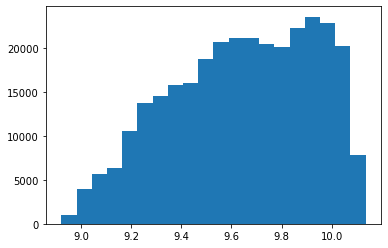

In [46]:
plt.hist(log_days_of_birth,bins=20)

In [47]:
df_kahmin["DAYS_BIRTH_LOG"] = log_days_of_birth

In [48]:
df_kahmin["CNT_FAM_MEMBERS"] = app_train_copy["CNT_FAM_MEMBERS"]

In [49]:
df_kahmin.head()

,SK_ID_CURR,unknown,with partner,without partner,DAYS_BIRTH_LOG,CNT_FAM_MEMBERS
0,100002,0,0,1,9.154933,1.0
1,100003,0,1,0,9.727049,2.0
2,100004,0,0,1,9.854612,1.0
3,100006,0,1,0,9.852457,2.0
4,100007,0,0,1,9.900082,1.0


### Concatenating the individual dataframes

In [50]:
df_merged_bk = df_bora.merge(df_kahmin, on="SK_ID_CURR", how="left")
df_merged_bkl = df_merged_bk.merge(df_lennard, on="SK_ID_CURR", how="left")
df_merged_bklm = df_merged_bkl.merge(df_maha, on="SK_ID_CURR", how="left")
df_merged_bklms = df_merged_bklm.merge(df_sailan, on="SK_ID_CURR", how="left")

In [51]:
df_merged_bklms.head()

,SK_ID_CURR,AMT_ANNUITY,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,AMT_ANNUITY_LOG,unknown,...,NAME_CONTRACT_TYPE,AMT_INCOME_WINSORZD_LOG,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,AMT_CREDIT_MNMX_SCALED
0,100002,24700.5,0,1,0,0,0,0,10.114579,0,...,1,12.218495,0,0,0,0,0,0,1,0.090287
1,100003,35698.5,0,1,0,0,0,0,10.482864,0,...,1,12.506177,0,0,0,1,0,0,0,0.311736
2,100004,6750.0,0,1,0,0,0,0,8.817298,0,...,0,11.119883,0,0,0,0,0,0,1,0.022472
3,100006,29686.5,0,1,0,0,0,0,10.298448,0,...,1,11.813030,0,0,0,0,0,0,1,0.066837
4,100007,21865.5,0,1,0,0,0,0,9.992665,0,...,1,11.707670,0,0,0,0,0,0,1,0.116854


### One last check of data...

In [53]:
df_merged_bklms.isnull().sum()

SK_ID_CURR                                0
AMT_ANNUITY                              12
NAME_HOUSING_TYPE_Co-op apartment         0
NAME_HOUSING_TYPE_House / apartment       0
NAME_HOUSING_TYPE_Municipal apartment     0
NAME_HOUSING_TYPE_Office apartment        0
NAME_HOUSING_TYPE_Rented apartment        0
NAME_HOUSING_TYPE_With parents            0
AMT_ANNUITY_LOG                          12
unknown                                   0
with partner                              0
without partner                           0
DAYS_BIRTH_LOG                            0
CNT_FAM_MEMBERS                           2
HIGHER_EDUCATION                          0
NAME_CONTRACT_TYPE                        0
AMT_INCOME_WINSORZD_LOG                   0
NAME_INCOME_TYPE_Commercial associate     0
NAME_INCOME_TYPE_Maternity leave          0
NAME_INCOME_TYPE_Pensioner                0
NAME_INCOME_TYPE_State servant            0
NAME_INCOME_TYPE_Student                  0
NAME_INCOME_TYPE_Unemployed     

#### Since we have only a few of rows with null values, they will be just dropped rather than doing any kind of imputing

In [57]:
null_values = df_merged_bklms[df_merged_bklms['AMT_ANNUITY'].isnull()].index.tolist() + df_merged_bklms[df_merged_bklms['CNT_FAM_MEMBERS'].isnull()].index.tolist()

In [58]:
print(null_values)

[47531, 50035, 51594, 55025, 59934, 75873, 89343, 123872, 207186, 227939, 239329, 241835, 41982, 187348]


In [59]:
df_merged_bklms.drop(null_values, axis=0, inplace=True)

In [66]:
# Dropping the same rows from the app_train dataset for "y"
app_train.drop(null_values, axis=0, inplace=True)

In [60]:
df_merged_bklms.isnull().sum()

SK_ID_CURR                               0
AMT_ANNUITY                              0
NAME_HOUSING_TYPE_Co-op apartment        0
NAME_HOUSING_TYPE_House / apartment      0
NAME_HOUSING_TYPE_Municipal apartment    0
NAME_HOUSING_TYPE_Office apartment       0
NAME_HOUSING_TYPE_Rented apartment       0
NAME_HOUSING_TYPE_With parents           0
AMT_ANNUITY_LOG                          0
unknown                                  0
with partner                             0
without partner                          0
DAYS_BIRTH_LOG                           0
CNT_FAM_MEMBERS                          0
HIGHER_EDUCATION                         0
NAME_CONTRACT_TYPE                       0
AMT_INCOME_WINSORZD_LOG                  0
NAME_INCOME_TYPE_Commercial associate    0
NAME_INCOME_TYPE_Maternity leave         0
NAME_INCOME_TYPE_Pensioner               0
NAME_INCOME_TYPE_State servant           0
NAME_INCOME_TYPE_Student                 0
NAME_INCOME_TYPE_Unemployed              0
NAME_INCOME

In [62]:
df_merged_bklms.head()

,SK_ID_CURR,AMT_ANNUITY,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,AMT_ANNUITY_LOG,unknown,...,NAME_CONTRACT_TYPE,AMT_INCOME_WINSORZD_LOG,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,AMT_CREDIT_MNMX_SCALED
0,100002,24700.5,0,1,0,0,0,0,10.114579,0,...,1,12.218495,0,0,0,0,0,0,1,0.090287
1,100003,35698.5,0,1,0,0,0,0,10.482864,0,...,1,12.506177,0,0,0,1,0,0,0,0.311736
2,100004,6750.0,0,1,0,0,0,0,8.817298,0,...,0,11.119883,0,0,0,0,0,0,1,0.022472
3,100006,29686.5,0,1,0,0,0,0,10.298448,0,...,1,11.813030,0,0,0,0,0,0,1,0.066837
4,100007,21865.5,0,1,0,0,0,0,9.992665,0,...,1,11.707670,0,0,0,0,0,0,1,0.116854


#### The ID column is not needed for the model. Dropping...

In [63]:
df_merged_bklms.drop(['SK_ID_CURR'],inplace=True,axis=1)

### LOGISTIC REGRESSION MODEL

In [67]:
X = df_merged_bklms
y = app_train["TARGET"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=84)
X_train.shape,y_train.shape

((230622, 24), (230622,))

In [68]:
lreg=LogisticRegression()
lreg.fit(X_train,y_train)
print("Train score :",round(lreg.score(X_train,y_train),2))

Train score : 0.92


In [ ]:
# Print indexes of the rows where the columns ANNUITY and NAME_CONTRACT_TYPE have NULL values
# Remove those rows from the TRAIN data AS WELL AS THE TEST data afterwards

In [76]:
accuracies = []
model = []

kf = KFold(n_splits=10)
#kf.get_n_splits(features)
kf.get_n_splits(df_merged_bklms.columns)

X = df_merged_bklms
y = app_train["TARGET"]

for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

lr = LogisticRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

model.append(lr)
accuracies.append(accuracy_score(predictions, y_test))

index = (accuracies == np.max(accuracies))


print('The best model has accuracy of: ', accuracies[index])
print('Coeficients are: ', model[index].coef_)

KeyError: "None of [Int64Index([ 30752,  30753,  30754,  30755,  30756,  30757,  30758,  30759,\n             30760,  30761,\n            ...\n            307501, 307502, 307503, 307504, 307505, 307506, 307507, 307508,\n            307509, 307510],\n           dtype='int64', length=276759)] are in the [columns]"

In [61]:
df_merged_bklms.isnull().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 24 columns):
 #   Column                                 Non-Null Count   Dtype
---  ------                                 --------------   -----
 0   AMT_ANNUITY                            307511 non-null  bool 
 1   NAME_HOUSING_TYPE_Co-op apartment      307511 non-null  bool 
 2   NAME_HOUSING_TYPE_House / apartment    307511 non-null  bool 
 3   NAME_HOUSING_TYPE_Municipal apartment  307511 non-null  bool 
 4   NAME_HOUSING_TYPE_Office apartment     307511 non-null  bool 
 5   NAME_HOUSING_TYPE_Rented apartment     307511 non-null  bool 
 6   NAME_HOUSING_TYPE_With parents         307511 non-null  bool 
 7   AMT_ANNUITY_LOG                        307511 non-null  bool 
 8   unknown                                307511 non-null  bool 
 9   with partner                           307511 non-null  bool 
 10  without partner                        307511 non-null  bool 
 11  DAYS_BIRTH_LO